In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow import one_hot
from tensorflow.keras import regularizers

In [2]:
df = pd.read_csv("mnist_test.csv",sep=',') #reading data 
X_data = df.drop(['label'], axis=1).to_numpy() # features into numpy arrays 
y_data = df[['label']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # Split the data 

# One-hot encoding
y_train_hot = one_hot(y_train, depth=10)
y_test_hot = one_hot(y_test, depth=10)



In [3]:
tf.random.set_seed(1234) # Same seed as in class for comparision 

# Model


In [4]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=128,kernel_regularizer = regularizers.l1(0.00001), activation='relu',name='layer_hidden1'),   
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model

# Compiler

In [5]:
def compile_model(model):
        model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy', #one-hot  
              metrics=['accuracy'])

# Fit

In [6]:
model = get_model(X_train[0].shape)
compile_model(model)

epochs=10
myhistory=model.fit(X_train, y_train_hot[:,0],  epochs=epochs, validation_split=0.1, verbose=False)

# Evaluate

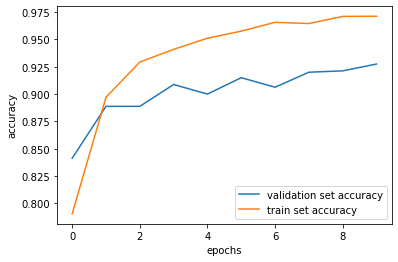

In [7]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

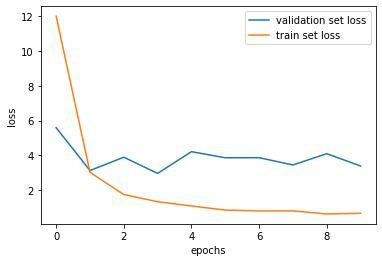

In [8]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_loss'],label='validation set loss')
ax.plot(xvals, myhistory.history['loss'],label='train set loss')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend()

In [39]:
loss, accuracy=model.evaluate(X_test, y_test_hot[:,0])
print('accuracy',accuracy)

63/63 [==============================] - 1s 6ms/step - loss: 2.5604 - accuracy: 0.9510
accuracy 0.9509999752044678


# Summary 

A NN, with an accuracy of $\approx95\%$, for the clasification of the mnist dataset was developed using the following architerature 

* One-hot encoding
* 1 hidden layer with 128 neurons and using relu activation function
* The output layer has 10 neurons and softmax activation function
* RMSprop was used for the optimizer
* Categorical_crossentropy as the loss function 
* Epoch = 10

Although the accuracy is sufficiently high, this model is overfitting as shown in the performance plots above.   


